In [3]:
from kafka import KafkaConsumer
import json

# To consume latest messages and auto-commit offsets
consumer = KafkaConsumer('my-topic',
                         client_id='client1',
                         group_id='my-group',
                         bootstrap_servers=['localhost:9092'],
                         value_deserializer=lambda v: json.loads(v.decode('ascii')),
                         key_deserializer=lambda v: json.loads(v.decode('ascii')),
                         max_poll_records=10)

In [4]:
consumer.topics()
consumer.subscribe(topics='find_cat')
consumer.subscription()

for msg in consumer:
    dir(msg)
    print('%d: %d: k=%s v=%s' % (msg.partition,
                                msg.offset,
                                msg.key,
                                msg.value))
    print(msg.topic)

0: 1: k={'id': 100} v={'name': 'pavel', 'breez': 'xxx', 'img_path': '...img', 'geo': 111}
find_cat


KeyboardInterrupt: 

In [1]:
consumer = KafkaConsumer('my-topic',
                         client_id='client1',
                         group_id='my-group',
                         bootstrap_servers=['localhost:9092'],
                         value_deserializer=lambda v: json.loads(v.decode('utf-8')),
                         key_deserializer=lambda v: json.loads(v.decode('utf-8')),
                         max_poll_records=10)
consumer.topics()
consumer.subscribe(topics='imgs')
consumer.subscription()

for msg in consumer:
    print(msg)


NameError: name 'KafkaConsumer' is not defined

In [18]:
from PIL import Image
from io import BytesIO
from kafka import KafkaConsumer
consumer = KafkaConsumer("TestTopic",bootstrap_servers=['localhost:9092'],
                        api_version=(0,10,1))

for message in consumer:
    stream = BytesIO(message.value)
    print(message.value)
    image = Image.open(stream).convert("RGBA")
    print(image.shape)
    stream.close()
    image.show()

KeyboardInterrupt: 

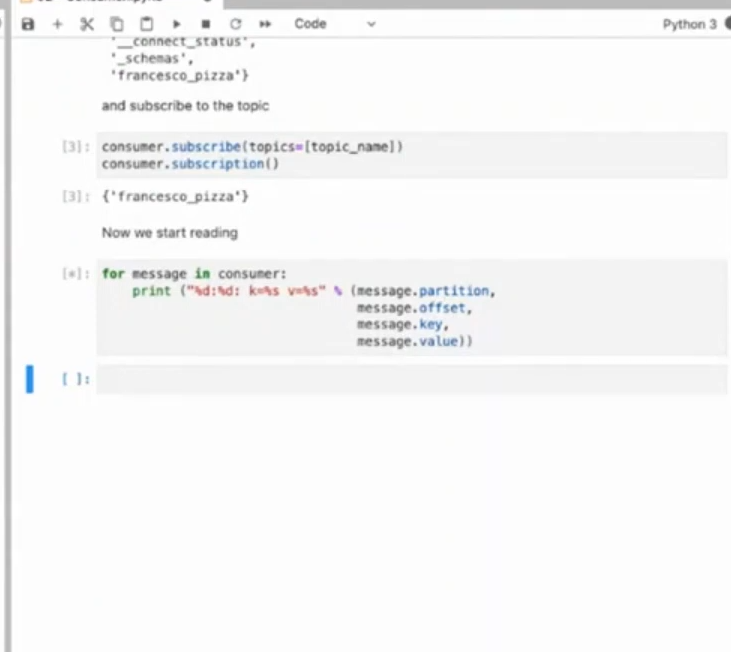

In [6]:
# for message in consumer:
#     # message value and key are raw bytes -- decode if necessary!
#     # e.g., for unicode: `message.value.decode('utf-8')`
#     print ("%s:%d:%d: key=%s value=%s" % (message.topic, message.partition,
#                                           message.offset, message.key,
#                                           message.value))

# # consume earliest available messages, don't commit offsets
# KafkaConsumer(auto_offset_reset='earliest', enable_auto_commit=False)

# # consume json messages
# KafkaConsumer(value_deserializer=lambda m: json.loads(m.decode('ascii')))

# # consume msgpack
# KafkaConsumer(value_deserializer=msgpack.unpackb)

# # StopIteration if no message after 1sec
# KafkaConsumer(consumer_timeout_ms=1000)

# # Subscribe to a regex topic pattern
# consumer = KafkaConsumer()
# consumer.subscribe(pattern='^awesome.*')

# # Use multiple consumers in parallel w/ 0.9 kafka brokers
# # typically you would run each on a different server / process / CPU
# consumer1 = KafkaConsumer('my-topic',
#                           group_id='my-group',
#                           bootstrap_servers='my.server.com')
# consumer2 = KafkaConsumer('my-topic',
#                           group_id='my-group',
#                           bootstrap_servers='my.server.com')